# Playlist Categorization

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hdbscan
import scipy.cluster.hierarchy as sch
import scipy
import plotly.figure_factory as ff
import plotly.figure_factory as ff

In [256]:
df = pd.read_csv("/Users/santiago/ih-bootcamp/proyectos/sherpa/out/spoty/ambient_set.csv")

In [257]:
df = df.iloc[:, 3:]

In [258]:
len(df)

295

In [259]:
df.head()

,track_id,artist,track,album,duration,tempo,energy,danceability,valence,key,time_signature,acousticness,instrumentalness,mode,styles
0,2t7OLqJA5oD5I5QZRwMPAR,Healion,About Breathing,"In Light, It Undoes Nothing...",7.200000,160.011,0.676,0.618,0.146,F#,4,0.0609,0.735,0,"['Drum n Bass', 'IDM', 'Leftfield']"
1,1adXPHPWJrsa90kHuJZNrV,Healion,About Breathing - Remix,"In Light, It Undoes Nothing...",6.143417,159.994,0.913,0.724,0.948,D#,4,0.0269,0.821,0,"['Drum n Bass', 'IDM', 'Leftfield']"
2,5sBXirjKrYh57rEGOiUBtP,Healion,Vetiver,"In Light, It Undoes Nothing...",4.625000,128.007,0.594,0.644,0.585,G#,4,0.4800,0.889,0,"['Drum n Bass', 'IDM', 'Leftfield']"
3,6EnNR8NnMTznFVowHfWPk8,Healion,I'll See It When I Believe It,"In Light, It Undoes Nothing...",4.382600,112.795,0.523,0.220,0.287,A,4,0.4830,0.773,0,"['Drum n Bass', 'IDM', 'Leftfield']"
4,33wGiihh5zKVLAb3J3DvBk,Healion,Gathering,"In Light, It Undoes Nothing...",4.053333,149.986,0.882,0.578,0.821,F#,4,0.4960,0.877,1,"['Drum n Bass', 'IDM', 'Leftfield']"


In [260]:
df.tempo=df.tempo.round().astype(int)

In [261]:
df.duration=df.duration.round(decimals=2)

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          295 non-null    object 
 1   artist            295 non-null    object 
 2   track             295 non-null    object 
 3   album             295 non-null    object 
 4   duration          295 non-null    float64
 5   tempo             295 non-null    int64  
 6   energy            295 non-null    float64
 7   danceability      295 non-null    float64
 8   valence           295 non-null    float64
 9   key               295 non-null    object 
 10  time_signature    295 non-null    int64  
 11  acousticness      295 non-null    float64
 12  instrumentalness  295 non-null    float64
 13  mode              295 non-null    int64  
 14  styles            259 non-null    object 
dtypes: float64(6), int64(3), object(6)
memory usage: 34.7+ KB


## Clusterizando

In [263]:
from sklearn.mixture import GaussianMixture as GMM

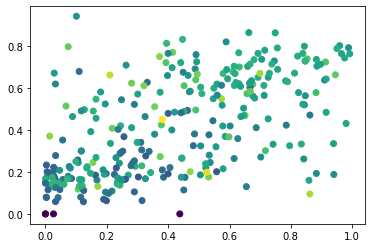

In [264]:
plt.scatter(df.energy, df.danceability, c=df.tempo)

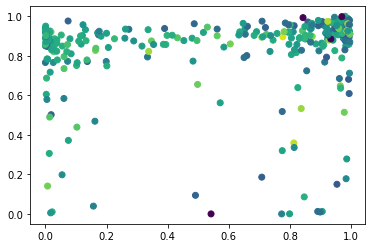

In [265]:
plt.scatter(df.acousticness, df.instrumentalness, c=df.tempo)

In [267]:
df.columns

Index(['track_id', 'artist', 'track', 'album', 'duration', 'tempo', 'energy',
       'danceability', 'valence', 'key', 'time_signature', 'acousticness',
       'instrumentalness', 'mode', 'styles'],
      dtype='object')

In [268]:
import hdbscan
import scipy.cluster.hierarchy as sch
import scipy

In [269]:
df_modelo = df[['energy','danceability', 'tempo', 'track']]

In [271]:
df_modelo.tempo=[(valor - df_modelo.tempo.min()) / (df_modelo.tempo.max() - df_modelo.tempo.min()) for valor in df_modelo.tempo]

In [284]:
cluster_hdb = hdbscan.HDBSCAN(min_cluster_size = 20, gen_min_span_tree = True, algorithm='best')
cluster_hdb.fit(df_modelo.set_index('track'))

HDBSCAN(gen_min_span_tree=True, min_cluster_size=20)

In [273]:
df_modelo['cluster'] = cluster_hdb.labels_

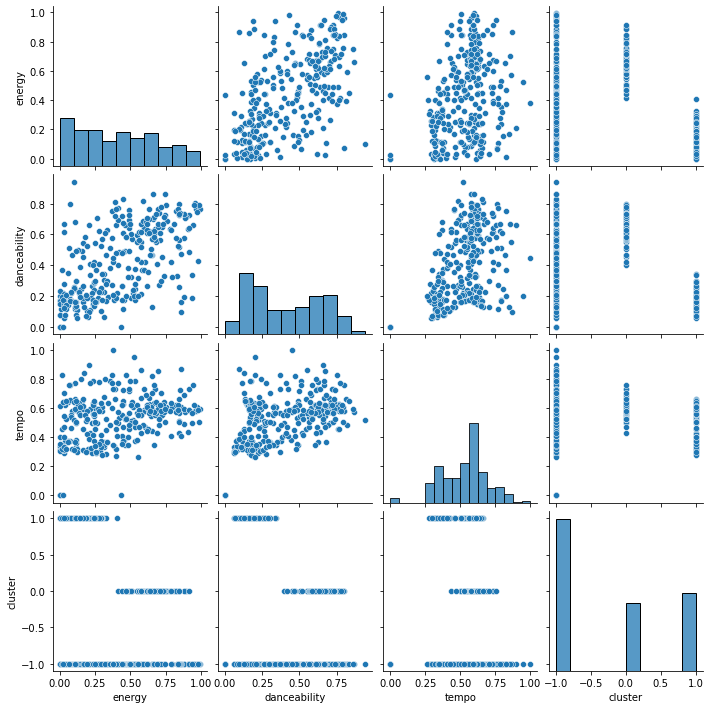

In [274]:
sns.pairplot(df_modelo)

In [275]:
df_modelo.head()

,energy,danceability,tempo,track,cluster
0,0.676,0.618,0.733945,About Breathing,0
1,0.913,0.724,0.733945,About Breathing - Remix,-1
2,0.594,0.644,0.587156,Vetiver,0
3,0.523,0.220,0.518349,I'll See It When I Believe It,-1
4,0.882,0.578,0.688073,Gathering,-1


/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

<ipython-input-285-0404328a528d>:2: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



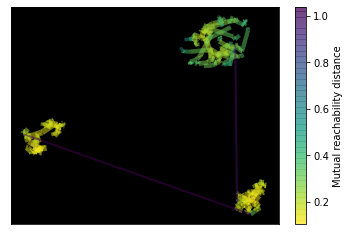

In [285]:
cluster_hdb.minimum_spanning_tree_.plot()
ax = plt.axes()
ax.set_facecolor("black")
plt.savefig('cluster_2.png')

<ipython-input-277-ce413cd21606>:3: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



AttributeError: 'AxesSubplot' object has no attribute 'set_textcolor'

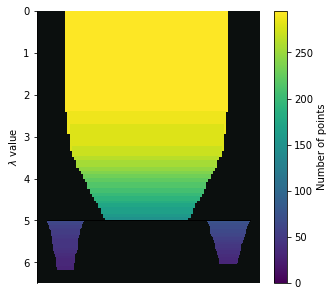

In [277]:
plt.figure(figsize = (5,5))
cluster_hdb.condensed_tree_.plot()
ax = plt.axes()
ax.set_facecolor("#0b0f0e")
ax.set_textcolor("#0b0f0e")
plt.savefig('cluster_1.png')

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df_modelo, x='energy', y='danceability', z='tempo',opacity=0.7, size =[0.2 for i in range(len(df_modelo))] )
fig.show()

In [286]:
df['cluster'] = cluster_hdb.labels_

In [287]:
df_c=df.groupby('cluster').mean()[['energy', 'danceability', 'tempo']].reset_index()

In [288]:
df_c

,cluster,energy,danceability,tempo
0,0,0.147547,0.183166,96.350649
1,1,0.665731,0.641552,129.880597
2,2,0.440729,0.419244,120.086093


In [289]:
df_c.cluster=np.where(df_c.cluster==2, "medias", np.where(df_c.cluster==1, "rápidas", "lentas"))

In [290]:
df.cluster.value_counts()

2    151
0     77
1     67
Name: cluster, dtype: int64

In [291]:
df.cluster=np.where(df.cluster==2, "medias", np.where(df.cluster==1, "rápidas", "lentas"))

In [292]:
df.head()

,track_id,artist,track,album,duration,tempo,energy,danceability,valence,key,time_signature,acousticness,instrumentalness,mode,styles,cluster
0,2t7OLqJA5oD5I5QZRwMPAR,Healion,About Breathing,"In Light, It Undoes Nothing...",7.20,160,0.676,0.618,0.146,F#,4,0.0609,0.735,0,"['Drum n Bass', 'IDM', 'Leftfield']",rápidas
1,1adXPHPWJrsa90kHuJZNrV,Healion,About Breathing - Remix,"In Light, It Undoes Nothing...",6.14,160,0.913,0.724,0.948,D#,4,0.0269,0.821,0,"['Drum n Bass', 'IDM', 'Leftfield']",medias
2,5sBXirjKrYh57rEGOiUBtP,Healion,Vetiver,"In Light, It Undoes Nothing...",4.62,128,0.594,0.644,0.585,G#,4,0.4800,0.889,0,"['Drum n Bass', 'IDM', 'Leftfield']",rápidas
3,6EnNR8NnMTznFVowHfWPk8,Healion,I'll See It When I Believe It,"In Light, It Undoes Nothing...",4.38,113,0.523,0.220,0.287,A,4,0.4830,0.773,0,"['Drum n Bass', 'IDM', 'Leftfield']",medias
4,33wGiihh5zKVLAb3J3DvBk,Healion,Gathering,"In Light, It Undoes Nothing...",4.05,150,0.882,0.578,0.821,F#,4,0.4960,0.877,1,"['Drum n Bass', 'IDM', 'Leftfield']",medias


In [293]:
df.to_csv("/Users/santiago/ih-bootcamp/proyectos/sherpa/out/df_clusterizada.csv")

## Plotly

In [226]:
df.columns

Index(['track_id', 'artist', 'track', 'album', 'duration', 'tempo', 'energy',
       'danceability', 'valence', 'key', 'time_signature', 'acousticness',
       'instrumentalness', 'mode', 'styles', 'cluster'],
      dtype='object')

In [227]:
df_modelo=df_modelo.set_index(df['track'])

In [229]:
df_modelo = df_modelo.set_index('track')

In [57]:
fig = ff.create_dendrogram(df_modelo.drop(['cluster'], axis=1), labels=df_modelo.index)
fig.update_layout(width=600, height=400)
fig.write_image("/Users/santiago/Desktop/C.png")
fig.show()

In [58]:
df[df.track=='Water Memory']

,track_id,artist,track,album,duration,tempo,energy,danceability,valence,key,time_signature,acousticness,instrumentalness,mode,styles,cluster
294,7v5rkoVS3eRh4qEH72mjo3,Perko,Water Memory,NV Auto,3.8,115,0.195,0.524,0.382,C#,4,0.989,0.925,0,"['Ambient', 'Breakbeat', 'Techno']",-1


In [97]:
df_modelo.iloc[232]

energy               0.29
danceability        0.105
valence             0.276
track           Nefertiti
Name: 232, dtype: object

## Generos vs clusters

In [439]:
set(df.styles.unique())

{"['Abstract']",
 "['Acid', 'Acid House', 'Tech House', 'Ambient']",
 "['Ambient', 'Breakbeat', 'Techno']",
 "['Ambient', 'Deep House']",
 "['Ambient', 'Experimental']",
 "['Ambient', 'House']",
 "['Ambient', 'IDM', 'New Age', 'Techno']",
 "['Ambient', 'Minimal', 'Downtempo']",
 "['Ambient']",
 "['Avantgarde']",
 "['Calypso']",
 "['Dance-pop', 'Synth-pop', 'House', 'Trap', 'Minimal', 'Pop Rap']",
 "['Drum n Bass', 'IDM', 'Leftfield']",
 "['Drum n Bass']",
 "['Dub Techno']",
 "['Experimental', 'Dubstep', 'Electro', 'Drum n Bass', 'Breaks']",
 "['House', 'Bass Music', 'UK Garage', 'Downtempo']",
 "['House', 'Deep House']",
 "['IDM', 'Techno', 'House', 'Jungle', 'Ambient']",
 "['Pop Punk', 'Emo']",
 "['Techno', 'Downtempo', 'Ambient']",
 "['Techno', 'Drum n Bass']",
 "['Techno', 'Electro', 'Breaks', 'Dubstep']",
 "['Techno', 'UK Garage', 'Dub']",
 "['Techno']",
 nan}

In [295]:
[df.styles[0][1:-1]]

["'Drum n Bass', 'IDM', 'Leftfield'"]

In [296]:
import ast

In [297]:
df.cluster[0]

'rápidas'

In [234]:
pd.DataFrame(df.cluster[0])

ValueError: DataFrame constructor not properly called!

In [298]:
df_d=pd.get_dummies(ast.literal_eval(df.styles[0]))

In [299]:
df_d['cluster']=df.cluster[0]

In [300]:
df_d

,Drum n Bass,IDM,Leftfield,cluster
0,1,0,0,rápidas
1,0,1,0,rápidas
2,0,0,1,rápidas


In [356]:
df_na=df.dropna().reset_index()

In [359]:
df_final = df_d.iloc[0:0, :]

In [360]:
df_final

,Drum n Bass,IDM,Leftfield,cluster


In [361]:
for i in range (1, len(df_na)):
    df_dd = pd.get_dummies(ast.literal_eval(df_na.styles[i]))
    df_dd['cluster']=df_na.cluster[i]
    df_final = pd.concat([df_dd, df_final])

In [362]:
df_final=df_final.fillna(0)

In [363]:
df_final=df_final.groupby('cluster').sum().T.reset_index()

In [354]:
print(list(df_final['index']))

['Ambient', 'Breakbeat', 'Techno', 'Acid', 'Acid House', 'Tech House', 'Bass Music', 'Downtempo', 'House', 'UK Garage', 'Dance-pop', 'Minimal', 'Pop Rap', 'Synth-pop', 'Trap', 'Dub', 'Drum n Bass', 'Calypso', 'Dub Techno', 'Breaks', 'Dubstep', 'Electro', 'Experimental', 'IDM', 'Jungle', 'Emo', 'Pop Punk', 'New Age', 'Avantgarde', 'Abstract', 'Deep House', 'Leftfield', 'lentas', 'medias', 'rápidas']


In [366]:
df_final['intenisdad']=['bajo', 'medio', 'alto', 'alto', 'medio', 'medio', 'medio', 'bajo', 'medio', 'alto', 'medio', 'alto', 'medio', 'medio',
'medio', 'medio', 'alto', 'medio', 'bajo', 'alto', 'alto', 'medio', 'bajo', 'medio', 'alto', 'medio', 'medio', 'bajo',
'bajo', 'bajo', 'medio', 'medio']

In [403]:
df_final.groupby('intenisdad').sum()['lentas']/df_final.groupby('intenisdad').sum()['lentas'].sum()*100

intenisdad
alto     11.340206
bajo     71.134021
medio    17.525773
Name: lentas, dtype: float64

In [406]:
tabla=df_final.groupby('intenisdad').mean()

In [421]:
tabla['lentas']=df_final.groupby('intenisdad').sum()['lentas']/df_final.groupby('intenisdad').sum()['lentas'].sum()*100
tabla['medias']=df_final.groupby('intenisdad').sum()['medias']/df_final.groupby('intenisdad').sum()['medias'].sum()*100
tabla['rápidas']=df_final.groupby('intenisdad').sum()['rápidas']/df_final.groupby('intenisdad').sum()['rápidas'].sum()*100

In [420]:
tabla

cluster,lentas,medias,rápidas
bajo,71.134021,45.296167,21.904762
medio,17.525773,30.662021,46.190476
alto,11.340206,24.041812,31.904762


In [411]:
tabla=pd.DataFrame(tabla,index=['bajo', 'medio', 'alto'])

In [412]:
t=pd.io.formats.style.Styler(tabla,precision=2)

In [413]:
t.background_gradient(cmap='Blues', axis=1)

cluster,lentas,medias,rápidas
bajo,71.13,45.30,21.90
medio,17.53,30.66,46.19
alto,11.34,24.04,31.90


In [415]:
t.export_png("generos.png")

In [398]:
c=pd.io.formats.style.Styler(pd.DataFrame(df_c.set_index('cluster'), index=['lentas', 'medias', 'rápidas']),precision=2)

In [399]:
c.export_png("clusters.png")

,cluster
lentas,77
medias,151
rápidas,67


In [433]:
counter=pd.DataFrame(df.cluster.value_counts(), index=['lentas', 'medias', 'rápidas'])

In [435]:
counter.columns=['total_cluster']

In [436]:
counter=pd.io.formats.style.Styler(counter)

In [437]:
counter.export_png("counter.png")

In [438]:
plt.gcf()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>